<a href="https://colab.research.google.com/github/sbreddy2020/sbreddy2020/blob/Agriculture/Smart_Agriculture_Production_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
### Smart Agriculture Production Optimization
#Agriculture depends largely on the nature of soil and the climatic conditions and many a times, we face unpredictable changes in climate like, 
#non-seasonal rainfall or heat waves or fluctuations in humidity levels, etc. and all such events cause a great loss to our farmers and farming, 
#because of which they are not able to utilize their agricultural land to it's fullest.So to solve all such problems, I have build a Machine Learning Model by the virtue of which we can help farmers, optimize the agricultural production, because this predictive model will help them understand that for a particular soil & given climatic condition, which crop will be best suitable for the harvest.

#There are 7 key factors that I've taken into account which will help us in determining, exactly which crop should be grown 
#and at what period of time, viz. Amount of Nitrogen, Phosphorus and Potassium in soil, Temperature in degree celcius, Humidity,
# pH and Rainfall in mm.

#Tools used: Python & Jupyter Notebook Libraries used: Numpy, Pandas, Seaborn, Matplotlib, ipywidgets and sklearn. 
#Machine Learning Algorithms used: Clustering Analysis and Logistic Regression.

In [6]:
###from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [9]:
dataframe = pd.read_csv("/content/Crop_recommendation.csv")


In [10]:
dataframe.shape

(2200, 8)

In [13]:
dataframe.info

<bound method DataFrame.info of         N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]>

In [12]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


Data That can be missing can be of two types :
1) Continuous Data
2) Discreate Or Categorical Data
The Types of missing can be of mentioned types :
1) MCAR - Missing Completely At Random
If the probability of being missing is same for all the observations.
2) MNAR - Missing Not At Random
There is some relationship between the missing data
3) MAR - Missing At Random **bold text**


In [16]:
dataframe.isnull().sum()
df=dataframe

In [94]:
# Check the unique values in dataset
df.apply(lambda x: len(x.unique()))

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [95]:
df['label'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22])

In [18]:
def impute_nan(df,variable,median):
  df[variable+"_median"]=df[variable].fillna(median)
  df[variable+"_random"]=df[variable]
  ##It will have the random sample to fill the na
  random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
  ##pandas need to have same index in order to merge the dataset
  random_sample.index=df[df[variable].isnull()].index
  df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [19]:
dataframe.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [20]:
dataframe.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [21]:
num_var = [feature for feature in dataframe.columns if dataframe[feature].dtypes != 'O']
discrete_var = [feature for feature in num_var if len(dataframe[feature].unique()) <= 25]
cont_var = [feature for feature in num_var if feature not in discrete_var]
categ_var = [feature for feature in dataframe.columns if feature not in num_var]

In [22]:
print(dataframe[num_var].columns)
print(dataframe[discrete_var].columns)
print(dataframe[cont_var].columns)
print(dataframe[categ_var].columns)

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], dtype='object')
Index([], dtype='object')
Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], dtype='object')
Index(['label'], dtype='object')


In [23]:
def find_var_type(var):
  if var in discrete_var:
    print("{} is a Numerical Variable, Discrete in nature".format(var))
  elif var in cont_var :
    print("{} is a Numerical Variable, Cntinuous in nature".format(var))
  else:
    print("{} is a Categorical Variable".format(var))

In [24]:
dataframe.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [25]:
find_var_type('label')

label is a Categorical Variable


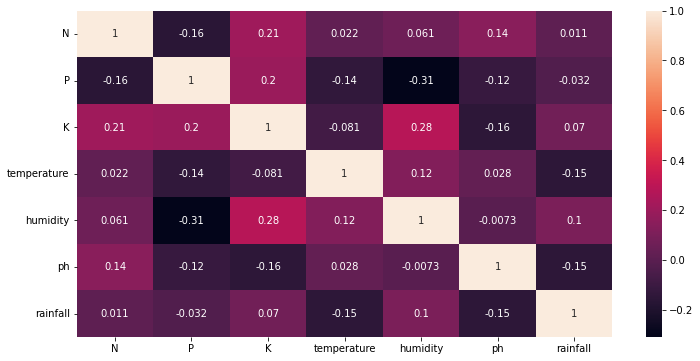

In [26]:
corrmat = dataframe.corr(method = "spearman")
plt.figure(figsize=(12,6))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

**Correlation Matrix**

<Axes: >

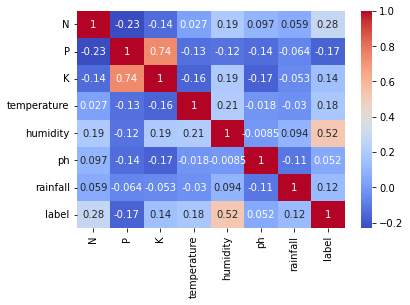

In [62]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [27]:
print(g)

Axes(0.125,0.125;0.62x0.755)


In [28]:
! pip install category-encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 3.7 MB/s eta 0:00:00


In [29]:
from category_encoders import *

In [30]:
import category_encoders as ce

In [31]:
print(dataframe.label.unique())

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [54]:
df['label'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22])

In [53]:
df['label'].value_counts()

1     100
2     100
21    100
20    100
19    100
18    100
17    100
16    100
15    100
14    100
13    100
12    100
11    100
10    100
9     100
8     100
7     100
6     100
5     100
4     100
3     100
22    100
Name: label, dtype: int64

*Exploratory Data Analysis*

<Axes: xlabel='N', ylabel='Density'>

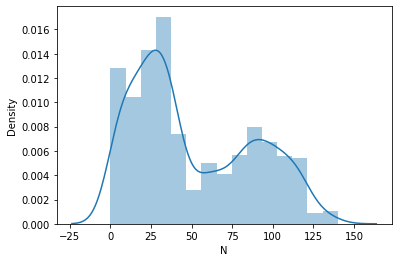

In [55]:
sns.distplot(df['N'])

<Axes: xlabel='P', ylabel='Density'>

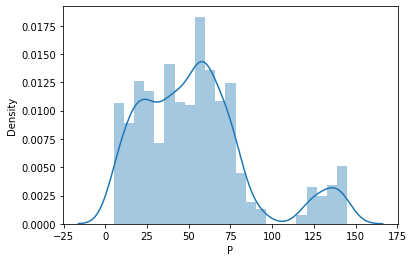

In [56]:
sns.distplot(df['P'])

<Axes: xlabel='K', ylabel='Density'>

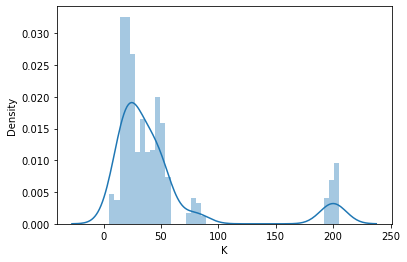

In [57]:
sns.distplot(df['K'])

<Axes: xlabel='temperature', ylabel='Density'>

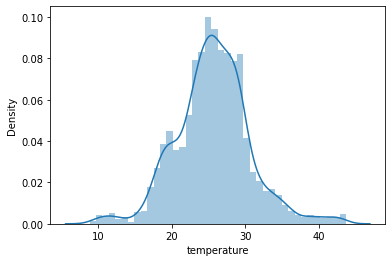

In [58]:
sns.distplot(df['temperature'])

<Axes: xlabel='humidity', ylabel='Density'>

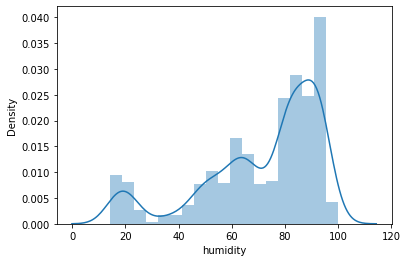

In [59]:
sns.distplot(df['humidity'])

<Axes: xlabel='ph', ylabel='Density'>

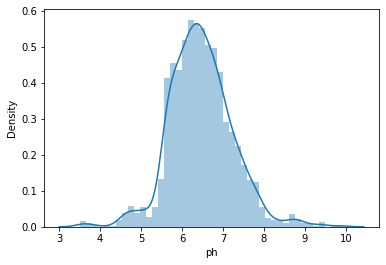

In [60]:
sns.distplot(df['ph'])

<Axes: xlabel='rainfall', ylabel='Density'>

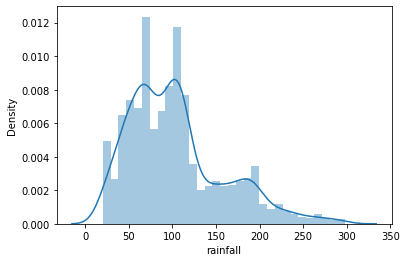

In [61]:
sns.distplot(df['rainfall'])

In [32]:
encoder = ce.OrdinalEncoder(cols = ['label'], return_df=True, mapping= [{'col' : 'label', 'mapping' : {
  'rice' : 1,
  'maize' : 2,
  'chickpea' : 3,
  'kidneybeans' : 4,
  'pigeonpeas' : 5,
  'mothbeans' : 6,
  'mungbean' : 7,
  'blackgram' : 8,
  'lentil' : 9,
  'pomegranate' : 10,
  'banana' : 11,
  'mango' : 12, 'grapes' : 13,
  'watermelon' : 14, 'muskmelon' : 15,
  'apple' : 16, 'orange' : 17, 'papaya' : 18,
  'coconut' : 19, 'cotton' : 20,
  'jute' : 21, 'coffee' : 22
}}])

In [33]:
dataframe['label'] = encoder.fit_transform(dataframe['label'])

In [34]:
print(dataframe.head(2))

    N   P   K  temperature   humidity        ph    rainfall  label
0  90  42  43    20.879744  82.002744  6.502985  202.935536      1
1  85  58  41    21.770462  80.319644  7.038096  226.655537      1


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
#x = dataframe.drop(["label"], axis=1)
#y = dataframe["label"]

In [86]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scale=StandardScaler()

In [39]:
scale.fit(x)

StandardScaler()

In [40]:
X=scale.transform(x)

In [42]:
x.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], dtype='object')

In [43]:
X=pd.DataFrame(X,columns=x.columns)

In [44]:
X.head(3)

,N,P,K,temperature,humidity,ph,rainfall
0,1.068797,-0.344551,-0.101688,-0.935587,0.472666,0.043302,1.810361
1,0.933329,0.140616,-0.141185,-0.759646,0.397051,0.734873,2.242058
2,0.255986,0.049647,-0.081939,-0.515898,0.486954,1.771510,2.921066


In [87]:
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state = 0)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [88]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1760, 7) (440, 7) (1760,) (440,)


**Feature Scaling**

In [89]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Training the Model on the Training set based  Logistic Regresion**

In [90]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

print("Logistic Regression's Accuracy :", acc)

Logistic Regression's Accuracy : 0.9636363636363636


In [91]:
# Cross validation score
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier, X, y, cv=5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96818182, 0.94318182])

In [92]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.88      0.94        25
           2       1.00      0.94      0.97        18
           3       1.00      1.00      1.00        23
           4       0.95      1.00      0.98        20
           5       0.91      0.95      0.93        22
           6       0.95      0.84      0.89        25
           7       1.00      1.00      1.00        17
           8       0.87      0.91      0.89        22
           9       0.82      0.82      0.82        17
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        18
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        18
          14       1.00      1.00      1.00        17
          15       0.96      1.00      0.98        23
          16       1.00      1.00      1.00        18
          17       1.00      1.00      1.00        23
          18       0.95    

**Support Vector Machine (SVM)**

In [93]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

print("Support Vector Machine's Accuracy :", acc)

Support Vector Machine's Accuracy : 0.9863636363636363


In [68]:
# Cross validation score
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier, X, y, cv=5)
score

array([0.98181818, 0.97727273, 0.98636364, 0.97954545, 0.98863636])

In [69]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.96      0.92      0.94        25
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        23
           4       0.95      1.00      0.98        20
           5       1.00      0.95      0.98        22
           6       0.96      0.96      0.96        25
           7       1.00      1.00      1.00        17
           8       1.00      1.00      1.00        22
           9       0.94      0.94      0.94        17
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        18
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        18
          14       1.00      1.00      1.00        17
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        18
          17       1.00      1.00      1.00        23
          18       1.00    

**K-Nearest Neighbours**

In [70]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

print("K-Nearest Neighbours's Accuracy :", acc)

K-Nearest Neighbours's Accuracy : 0.9659090909090909


In [71]:
# Cross validation score
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier, X, y, cv=5)
score

array([0.95909091, 0.96363636, 0.97045455, 0.96136364, 0.97272727])

In [72]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.80      0.89        25
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        23
           4       0.95      1.00      0.98        20
           5       1.00      0.86      0.93        22
           6       1.00      0.92      0.96        25
           7       1.00      1.00      1.00        17
           8       0.91      0.95      0.93        22
           9       0.89      0.94      0.91        17
          10       0.88      1.00      0.94        23
          11       1.00      1.00      1.00        18
          12       0.91      1.00      0.95        21
          13       1.00      1.00      1.00        18
          14       1.00      1.00      1.00        17
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        18
          17       1.00      0.87      0.93        23
          18       1.00    

**Kernel SVM**

In [73]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

print("Kernel SVM's Accuracy :", acc)

Kernel SVM's Accuracy : 0.9772727272727273


In [74]:
# Cross validation score
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier, X, y, cv=5)
score

array([0.98181818, 0.98409091, 0.98181818, 0.98181818, 0.98409091])

In [75]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.80      0.89        25
           2       1.00      0.94      0.97        18
           3       1.00      1.00      1.00        23
           4       0.95      1.00      0.98        20
           5       1.00      0.95      0.98        22
           6       0.96      0.96      0.96        25
           7       1.00      1.00      1.00        17
           8       1.00      0.95      0.98        22
           9       0.89      0.94      0.91        17
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        18
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        18
          14       1.00      1.00      1.00        17
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        18
          17       1.00      1.00      1.00        23
          18       1.00    

**Naive Bayes**

In [76]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

print("Naive Bayes's Accuracy :", acc)

Naive Bayes's Accuracy : 0.9931818181818182


In [77]:
# Cross validation score
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier, X, y, cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

In [78]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.88      0.94        25
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00        17
           8       1.00      1.00      1.00        22
           9       1.00      1.00      1.00        17
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        18
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        18
          14       1.00      1.00      1.00        17
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        18
          17       1.00      1.00      1.00        23
          18       1.00    

**Decision Tree Classification**

In [79]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

print("Decision Tree Classification's Accuracy :", acc)

Decision Tree Classification's Accuracy : 0.990909090909091


In [80]:
# Cross validation score
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier, X, y, cv=5)
score

array([0.98863636, 0.96818182, 0.99318182, 0.98636364, 0.97727273])

In [81]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        25
           2       0.86      1.00      0.92        18
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        22
           6       0.96      0.96      0.96        25
           7       1.00      1.00      1.00        17
           8       1.00      0.95      0.98        22
           9       1.00      1.00      1.00        17
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        18
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        18
          14       1.00      1.00      1.00        17
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        18
          17       1.00      1.00      1.00        23
          18       1.00    

**Random Forest Classification**

In [82]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

print("Random Forest Classification's Accuracy :", acc)

Random Forest Classification's Accuracy : 0.9977272727272727


In [83]:
# Cross validation score
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier, X, y, cv=5)
score

array([0.99545455, 0.99090909, 0.99545455, 0.99318182, 0.98863636])

In [84]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.96      0.98        25
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00        17
           8       1.00      1.00      1.00        22
           9       1.00      1.00      1.00        17
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        18
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        18
          14       1.00      1.00      1.00        17
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        18
          17       1.00      1.00      1.00        23
          18       1.00    

**Predicting a new result**

In [85]:
print(classifier.predict(sc.transform([[90,42,43,20.82312,82.00284,6.50232,202.93536]])))

[18]
